# Creating TF-IDF Model

The term TF stands for "term frequency" while the term IDF stands for the "inverse document frequency"

# Problem with Bag of Words Model

One of the main problems associated with the bag of words model is that it assigns equal value to the words, irrespective of their importance. The words that are rare have more classifying power compared to the words that are common.

The idea behind the TF-IDF approach is that the words that are more common in one sentence and less common in other sentences should be given high weights.

# Theory Behind TF-IDF

## Tokenization

## Find TF-IDF Values

the TF value refers to term frequency and can be calculated as follows:

TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)

IDF refers to inverse document frequency and can be calculated as follows:

IDF: (Total number of sentences (documents))/(Number of sentences (documents) containing the word)

It is important to mention that the IDF value for a word remains the same throughout all the documents as it depends upon the total number of documents. On the other hand, TF values of a word differ from document to document.

the TF-IDF values are calculated by multiplying TF values with their corresponding IDF values.

It is important to mention that to mitigate the effect of very rare and very common words on the corpus, the log of the IDF value can be calculated before multiplying it with the TF-IDF value. In such case the formula of IDF becomes:

IDF: log((Total number of sentences (documents))/(Number of sentences (documents) containing the word))

# TF-IDF Model from Scratch in Python

In [9]:
import nltk
import numpy as np
import random
import string
import bs4 as bs
import urllib.request
import re
import heapq

##  scrape the Wikipedia article on Natural Language Processing

In [2]:
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
raw_html = raw_html.read()

article_html = bs.BeautifulSoup(raw_html, 'lxml')
article_paragraphs = article_html.find_all('p')
article_text = ''

for para in article_paragraphs:
    article_text += para.text

## preprocess it to remove all the special characters and multiple empty spaces.

In [6]:
corpus = nltk.sent_tokenize(article_text)

In [7]:
for i in range(len(corpus)):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

## create a dictionary of word frequencies and then filter the top 200 most frequently occurring words.

In [8]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [10]:
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

## find the IDF values for the most frequently occurring words

In [13]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in corpus:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(corpus)/(1 + doc_containing_word))

## create the TF dictionary for each word

In [14]:
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in corpus:
        doc_freq = 0
        for word in nltk.word_tokenize(document):
            if token == word:
                doc_freq += 1
        word_tf = doc_freq/len(nltk.word_tokenize(document))
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector

## multiply IDF values with TF values

In [15]:
tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)

In [19]:
tf_idf_model = np.asarray(tfidf_values)
tf_idf_model = np.transpose(tf_idf_model)

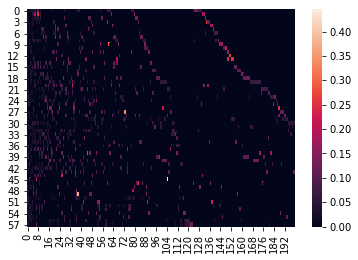

In [20]:
import seaborn as sns
sns.heatmap(tf_idf_model)